# Student Performance Indicator


## Index

1. Understanding the Problem Statement
2. Data Collection
3. Data Cleaning
4. Data Visualization
5. Data Pre-Processing
6. Model Training
7. Choose best model

## 1. Problem statement

**Problem Statement**  
The purpose of this EDA project is to understand how students’ performance is influenced by various demographic and preparatory factors. Specifically, we aim to examine the relationships between test scores and the following variables: gender, ethnicity, parental level of education, lunch status, and completion of a test preparation course.

**General Objective**  
*Conduct a comprehensive exploratory data analysis to explore how student test scores relate to key influencing variables: gender, ethnicity, parental education, lunch type, and test preparation status.*

**Specific Objectives**  

1. *Assess score distributions and identify data quality issues across demographic and preparatory variables.*  
2. *Investigate relationships between test performance and each influencing factor using both univariate and bivariate analyses.*  
3. *Create visual summaries (e.g., violin plots, bar charts, pair plots, heatmaps) to highlight how each variable affects student performance.*

## 2. Data Collection

### 2.1 Dataset Source

**Dataset Source:**   
spscientist. (n.d.). *Students performance in exams* [Dataset]. Kaggle. Retrieved August 15, 2025, from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.2 Import Data and Required Packages

**Required Libraries:**
- Numpy
- Pandas
- Seaborn
- Matplotlib
- Warnings

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the data from CSV File**

In [5]:
df = pd.read_csv('data/stud.csv')

**Show the first 5 records from the Dataset**

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Show the column and row distribution of the dataset (the shape)**

In [7]:
df.shape

(1000, 8)

### 2.3 Dataset General Observations

The dataset contains **8 columns** and **100 rows**. The columns are:

- **Gender**: Indicates the sex of the student → *Male* / *Female*  
- **Race/Ethnicity**: Indicates the ethnicity of the student → *Group A, B, C, D, E*  
- **Parental Level of Education**: The highest education level achieved by the student’s parent(s) → *High School, Some College, Associate’s Degree, Bachelor’s Degree, Master’s Degree*  
- **Lunch**: Type of lunch the student had before the test → *Standard* / *Free or Reduced*  
- **Test Preparation Course**: Whether the student completed a test preparation course → *None* / *Completed*  
- **Math Score**: The student’s score in mathematics → *0–100*  
- **Reading Score**: The student’s score in reading → *0–100*  
- **Writing Score**: The student’s score in writing → *0–100*


## 3. Data Cleaning

**The following data checks will be performed:**

1. *Check for missing values*  
2. *Check for duplicate records*  
3. *Verify data types*  
4. *Count the number of unique values in each column*  
5. *Review descriptive statistics of the dataset*  
6. *Inspect categories within each categorical column*
7. *Adding columns for further analysis*

### 3.1 Check for Missing Values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### 3.2 Check for Duplicate Records

In [9]:
df.duplicated().sum()

np.int64(0)

There are no duplicates  values in the data set

### 3.3 Verify Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Dataset Variables**

The dataset comprises a total of **eight variables**, of which **five are categorical** and **three are numerical**. The following table summarizes the variables, their types, and their respective categories:

| Variable                     | Type     | Description                                                   |
|------------------------------|----------|---------------------------------------------------------------|
| gender                       | object   | Student’s sex (*Male*, *Female*)                              |
| race_ethnicity               | object   | Student’s ethnicity group (*A*, *B*, *C*, *D*, *E*)           |
| parental_level_of_education  | object   | Highest education level of the student’s parent(s)            |
| lunch                        | object   | Type of lunch before the test (*Standard*, *Free/Reduced*)    |
| test_preparation_course      | object   | Test preparation status (*None*, *Completed*)                 |
| math_score                   | int64    | Student’s mathematics score (range: 0–100)                    |
| reading_score                | int64    | Student’s reading score (range: 0–100)                        |
| writing_score                | int64    | Student’s writing score (range: 0–100)                        |


### 3.4 Counting Unique Values

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**Variable Cardinality**

The dataset includes both categorical and numerical variables. The following table presents the number of unique values identified for each variable:

| Variable                     | Number of Unique Values | Interpretation                                                  |
|------------------------------|--------------------------|----------------------------------------------------------------|
| gender                       | 2                        | Two categories (*Male*, *Female*)                               |
| race_ethnicity               | 5                        | Five distinct groups (*A–E*)                                   |
| parental_level_of_education  | 6                        | Six levels of education                                         |
| lunch                        | 2                        | Two categories (*Standard*, *Free/Reduced*)                    |
| test_preparation_course      | 2                        | Two categories (*None*, *Completed*)                           |
| math_score                   | 81                       | Wide score distribution with 81 distinct values (0–100 range)  |
| reading_score                | 72                       | Wide score distribution with 72 distinct values (0–100 range)  |
| writing_score                | 77                       | Wide score distribution with 77 distinct values (0–100 range)  |

**Interpretation.**  
The categorical variables exhibit a limited number of categories, which facilitates group comparisons. In contrast, the numerical variables demonstrate substantial variability, as reflected in the high number of unique values, consistent with exam scores recorded on a 0–100 scale.


### 3.5 Descriptive Statistics

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Observations**

The descriptive statistics provide an overview of student performance across mathematics, reading, and writing. Several observations are found:

- **Central tendency.**  
  - Mean scores range from *66.1* in mathematics to *69.2* in reading, indicating that, on average, students perform slightly better in reading and writing compared to mathematics.
  - Median values (50th percentile) are closely aligned with the means, suggesting possibly symmetrical distributions in all three subjects.  

- **Variability.**  
  - Standard deviations range from *14.6* (reading) to *15.2* (writing), showing that variability is similar across subjects.  
  - The interquartile ranges (IQRs) are also consistent: approximately *20 points* across all subjects.  

- **Performance extremes.**  
  - Maximum scores of *100%* were achieved in each subject, indicating that some students reached full proficiency.  
  - Minimum scores differ: *0%* in mathematics, *10%* in writing, and *17%* in reading. Mathematics demonstrates the widest spread and the lowest floor of performance.  

- **Quartile insights.**  
  - The 25th percentile scores (≈*57–59*) indicate that one-quarter of students scored below 60 in each subject.  
  - The 75th percentile scores (≈*77–79*) show that the top quartile of students consistently scored near or above 80 across subjects.  

**Interpretation.**  
Overall, the results suggest that reading scores are slightly stronger on average, mathematics shows the lowest minimum and widest performance gap, and writing falls between the two. The similarity across means and medians across the three subjects suggests that the distributions are not heavily skewed.

### 3.6 Exploring Categorical Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
cat_columns = df.select_dtypes(include='object').columns
for column in cat_columns:
    print(f"Categories in {column} variable: {df[column].unique()}")

Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding Columns for Further Analysis

**Additional Performance Metrics**

To better assess overall student performance, two new variables will be introduced:

- *Total Score*: The sum of the three subject scores (Mathematics, Reading, and Writing). This represents the student’s cumulative achievement across all tests.  
- *Average Score*: The arithmetic mean of the three subject scores. This provides a normalized measure of performance that allows comparisons across students regardless of raw totals.  

| New Variable     | Calculation Formula                              | Interpretation                                   |
|------------------|--------------------------------------------------|-------------------------------------------------|
| Total Score      | `math_score + reading_score + writing_score`      | Overall performance across all three subjects   |
| Average Score    | `(math_score + reading_score + writing_score) / 3`| Normalized performance on a 0–100 scale         |

**Rationale.**  
The *Total Score* enables ranking students by absolute performance, while the *Average Score* allows for fairer comparison across students, as it standardizes performance on the same 0–100 scale as the original subject scores.


In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = df['total score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

for feature in numeric_features:
    print(f"Number of students with full marks in {feature}: {df[df[feature] == 100]['average'].count()}")

Number of students with full marks in math_score: 7
Number of students with full marks in reading_score: 17
Number of students with full marks in writing_score: 14
Number of students with full marks in total score: 0
Number of students with full marks in average: 3


In [18]:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

for feature in numeric_features:
    print(f"Number of students with less than 20 marks in {feature}: {df[df[feature] <= 20]['average'].count()}")

Number of students with less than 20 marks in math_score: 4
Number of students with less than 20 marks in reading_score: 1
Number of students with less than 20 marks in writing_score: 3
Number of students with less than 20 marks in total score: 0
Number of students with less than 20 marks in average: 2


**Observations**  
The analysis of subject-level performance reveals distinct patterns across reading, writing, and mathematics:

- **Highest performance.**  
  Reading appears to be the strongest subject, with *17 students* achieving full marks. This is followed by writing, with *14 students*, and mathematics, where only *7 students* reached full marks.  

- **Lowest performance.**  
  Mathematics also emerges as the weakest subject, with *4 students* scoring below 20 points. Writing follows with *3 students* under 20 points, while reading demonstrates the least extreme low performance, with only *1 student* scoring below 20 points.  

**Interpretation.**  
These results suggest that students generally perform best in reading, while mathematics represents the greatest challenge. Writing falls in between, with both high achievers and low performers represented.


## 4. Data Visualization

### 4.1 Average score distribution

#### 4.1.1 Average Score Distribution by Gender

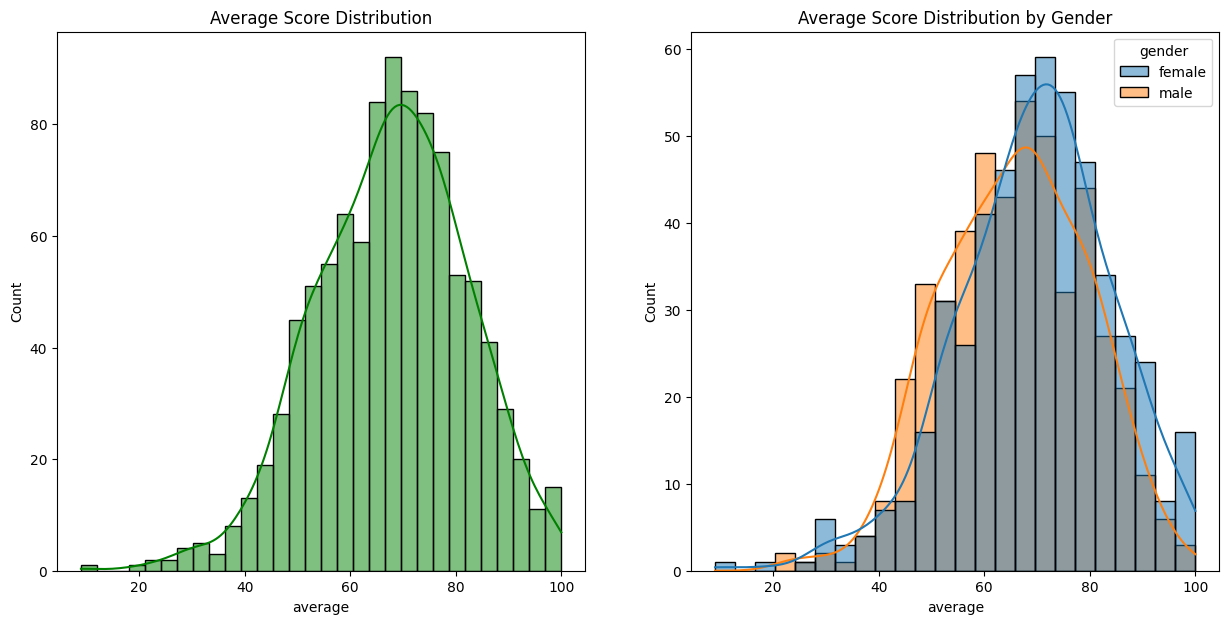

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Average Score Distribution")

sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Average Score Distribution by Gender")

plt.show()

**Observations by Gender**

The histogram reveals the following findings:  

- **Overall performance.**  
  The *average score* for all 3 subjects falls consistently between *60* and *70*.  

- **Gender comparison.**  
  Female students tend to perform *slightly better* than male students on average.

**Interpretation.**  
These results indicate that while overall student performance is moderate, gender may play a role in small performance differences, with females showing a slight advantage across subjects.


#### 4.1.2 Total Score Distribution by Gender

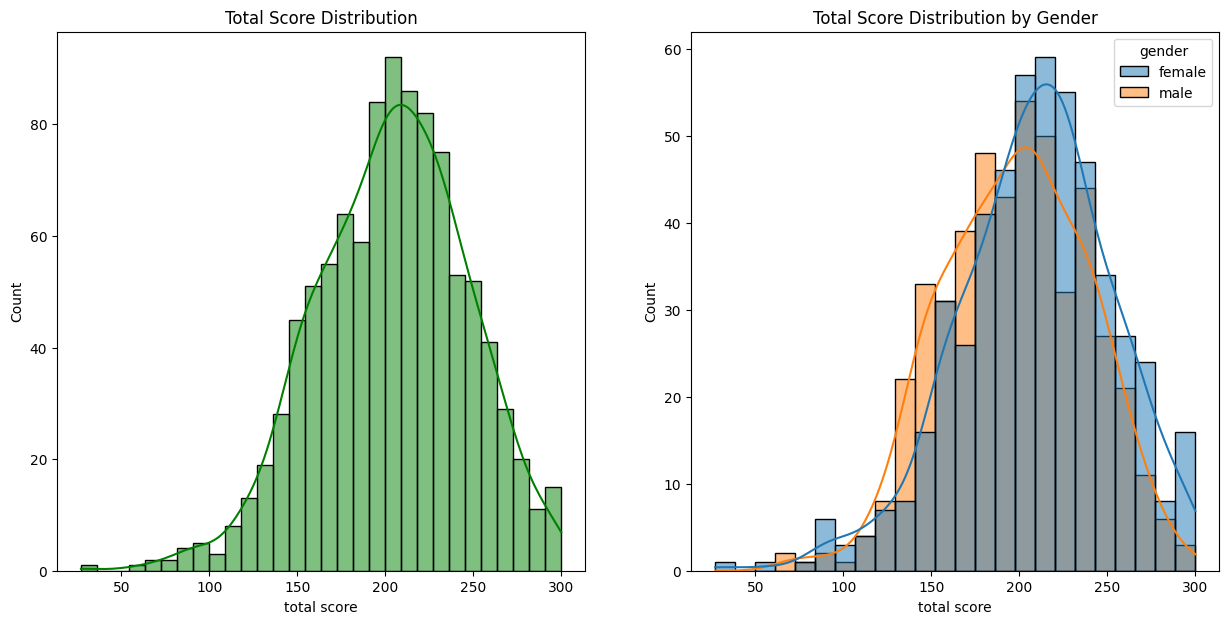

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Total Score Distribution")

sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Total Score Distribution by Gender")

plt.show()

**Observations by Total Score**

The distribution of total scores (sum of mathematics, reading, and writing) reveals the following findings:  

- **Overall performance.**  
  Most students’ *total scores* fall between *200* and *250*, reflecting moderate cumulative achievement across the three subjects.  

- **Gender comparison.**  
  Female students tend to achieve *slightly higher total scores* compared to male students, continuing the pattern observed in the individual subject scores.  

**Interpretation.**  
These findings suggest that when considering overall performance, female students maintain a modest advantage, with most students clustering around the mid-range of total achievement.

#### 4.1.3 Average Score Distribution by Lunch Type

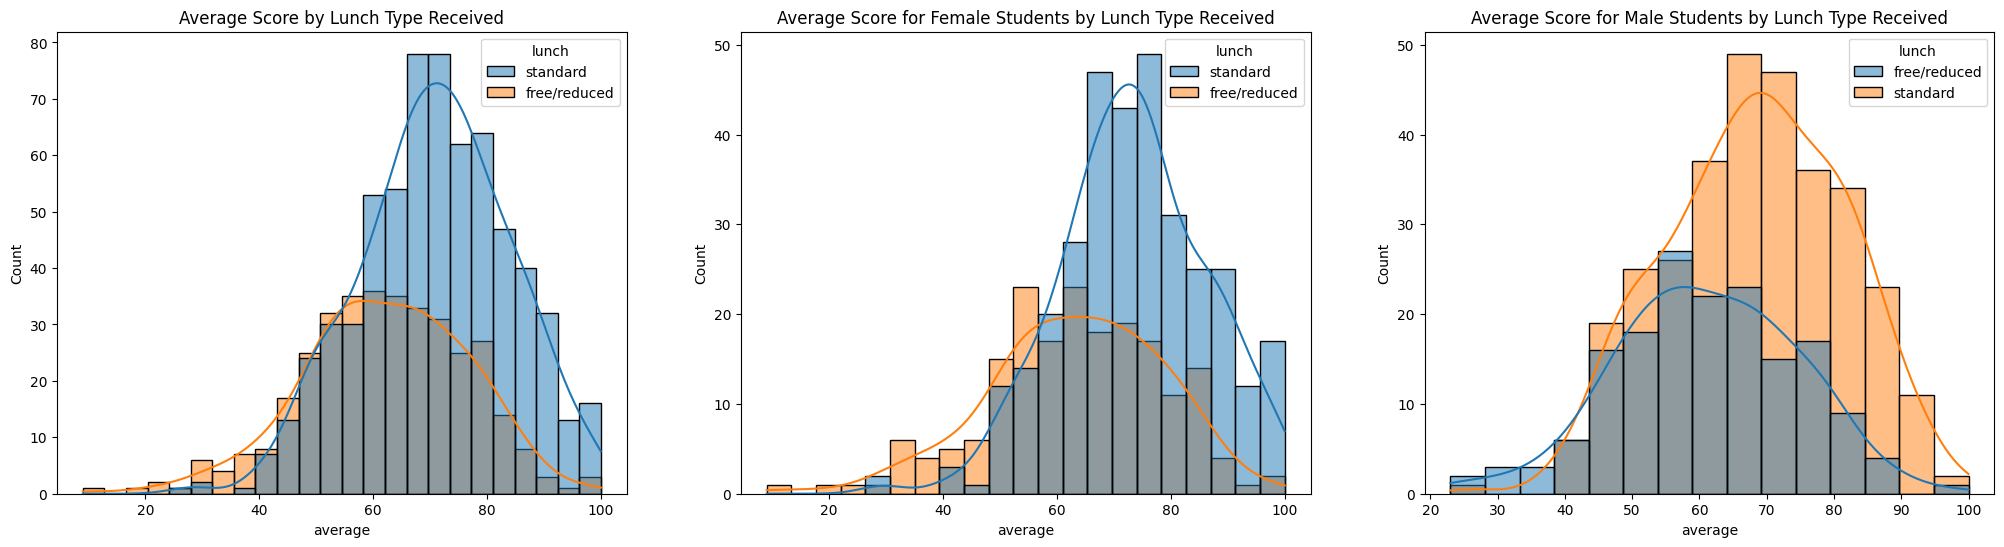

In [21]:
fig, axs = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title("Average Score by Lunch Type Received")

sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='lunch', ax=axs[1])
axs[1].set_title("Average Score for Female Students by Lunch Type Received")

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', ax=axs[2])
axs[2].set_title("Average Score for Male Students by Lunch Type Received")

plt.show()

**Observations by Lunch Type**

The analysis of student scores by lunch type reveals the following findings:  

- **Overall performance.**  
  On average, students who received a *standard lunch* demonstrated *higher average scores* compared to those who received free or reduced lunch.  

- **Gender comparison.**  
  Female students continue to show *slightly higher average scores* than male students overall. The same pattern applies when considering lunch type: students with a *standard lunch* outperform those with free or reduced lunch, regardless of gender.  

**Interpretation.**  
These results suggest that both lunch type and gender may influence performance, with standard lunch status and female gender each associated with modestly higher average scores.

#### 4.1.4 Average Score Distribution by Parental Level of Education

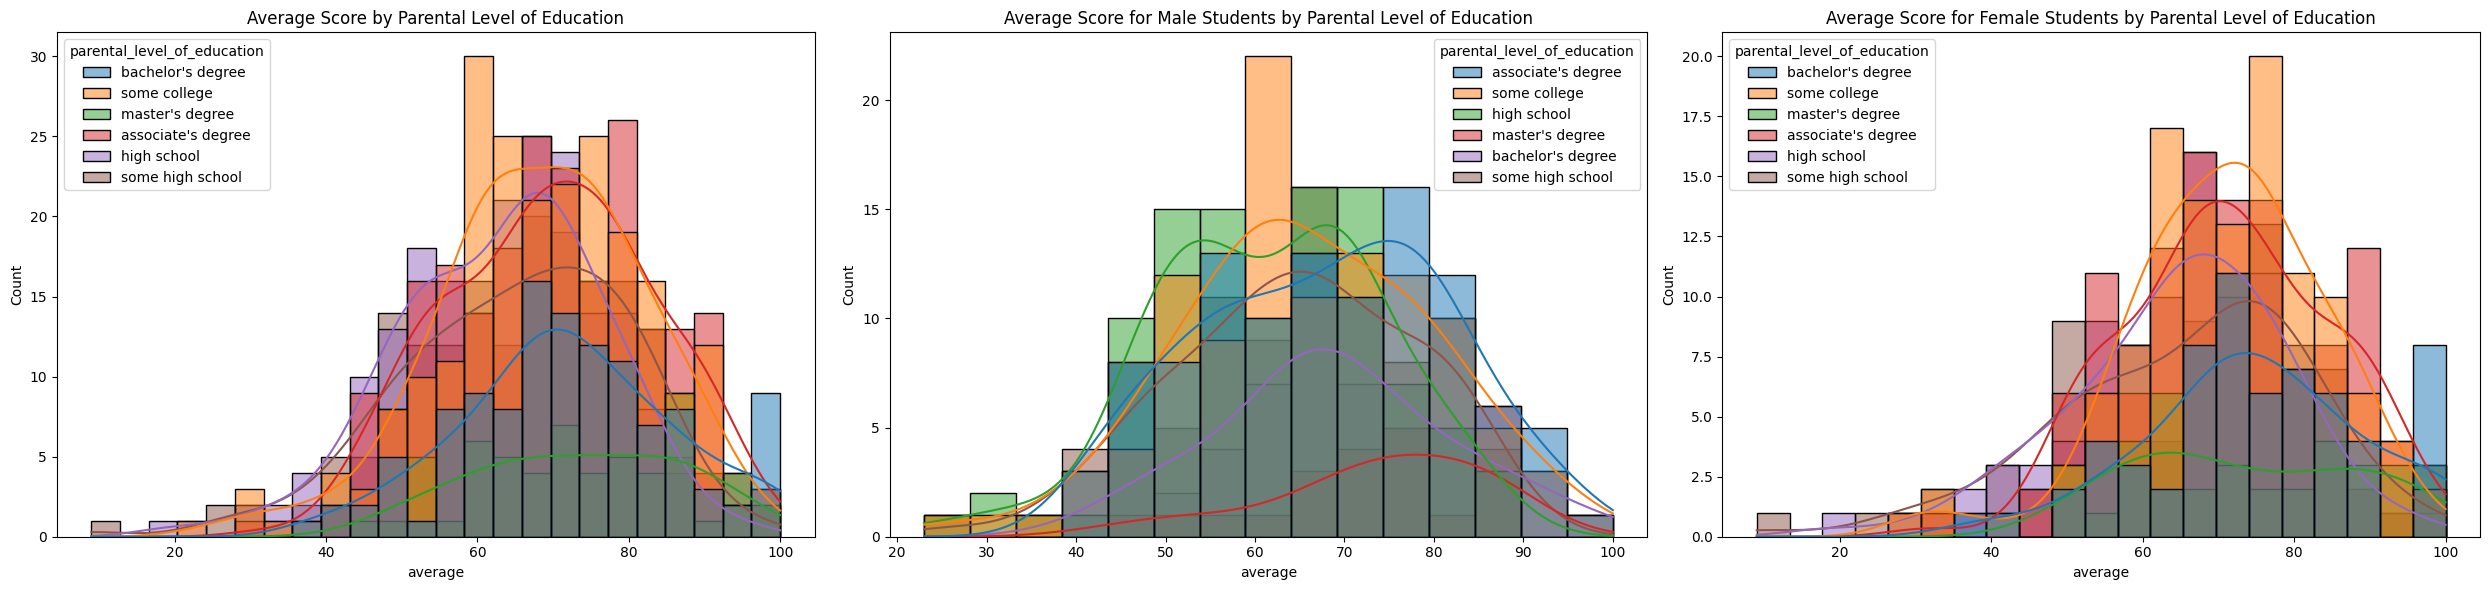

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title("Average Score by Parental Level of Education")

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title("Average Score for Male Students by Parental Level of Education")

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title("Average Score for Female Students by Parental Level of Education")

plt.tight_layout()
plt.show()

**Observations by Parental Level of Education**

The analysis of parental education and student performance reveals the following findings:  

- **General effect.**  
  Overall, parental level of education shows *little to no direct effect* on students’ exam performance.  

- **Male students.**  
  In the second visualization, male students whose parents attained an *associate’s degree* or a *master’s degree* tend to perform slightly better on average.  

- **Female students.**  
  In the third visualization, parental education appears to have *no observable effect* on female students’ performance.  

**Interpretation.**  
These results suggest that while parental education may play a minor role in shaping male students’ outcomes, its influence on female students is negligible.


#### 4.1.5 Average Score Distribution by Race/Ethnicity Group

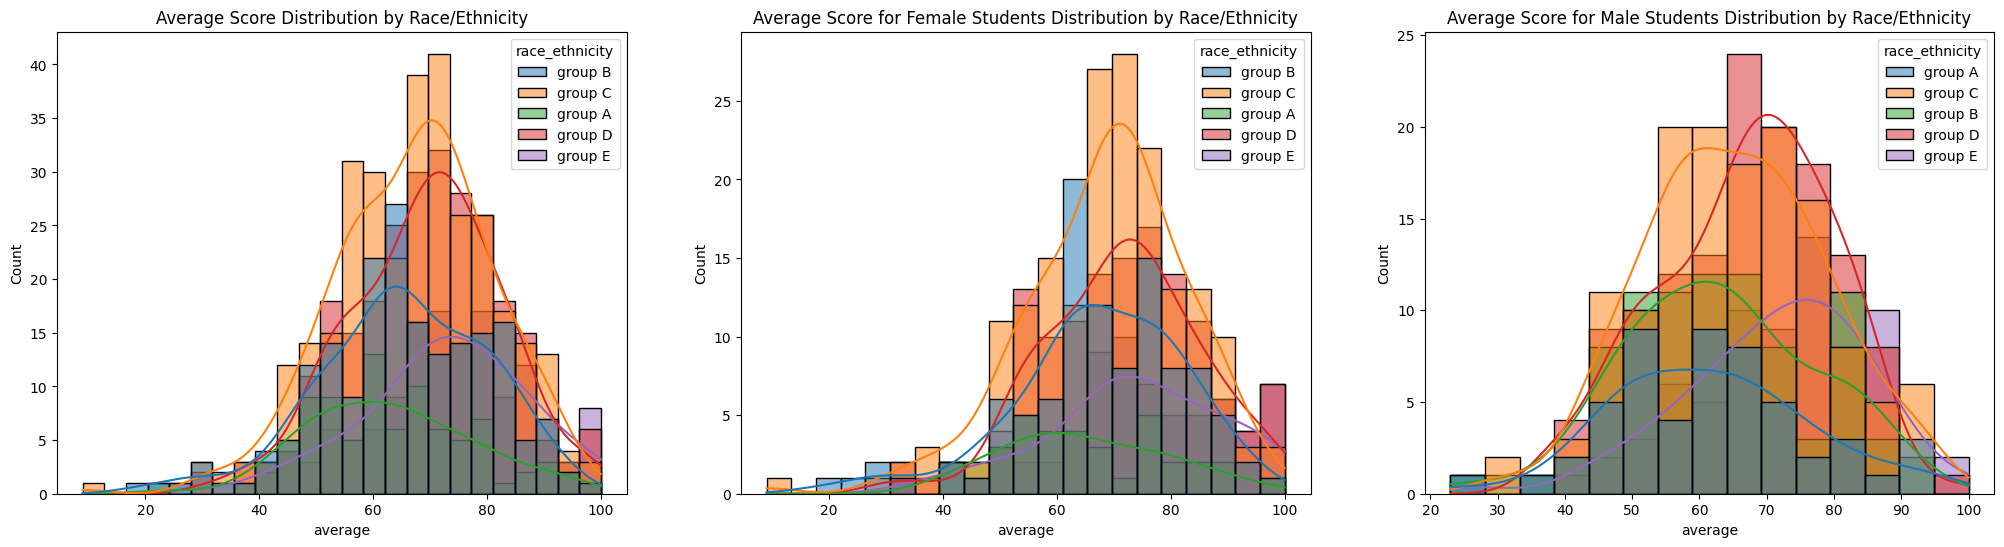

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title("Average Score Distribution by Race/Ethnicity")

sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity', ax = axs[1])
axs[1].set_title("Average Score for Female Students Distribution by Race/Ethnicity")

sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity', ax = axs[2])
axs[2].set_title("Average Score for Male Students Distribution by Race/Ethnicity")

plt.show()

**Observations**

The analysis of student performance by ethnicity group reveals the following findings:  

- **Overall performance.**  
  Students belonging to *Group A* and *Group B* tend to perform more poorly on exams compared to students from other groups.  

- **Gender comparison.**  
  This lower performance in *Group A* and *Group B* persists across both genders, indicating that the effect is consistent regardless of whether the student is male or female.  

**Interpretation.**  
These results suggest that membership in Groups A and B is associated with lower academic outcomes, and this trend holds true for both male and female students.


### 4.2 Maximumum score Distribution

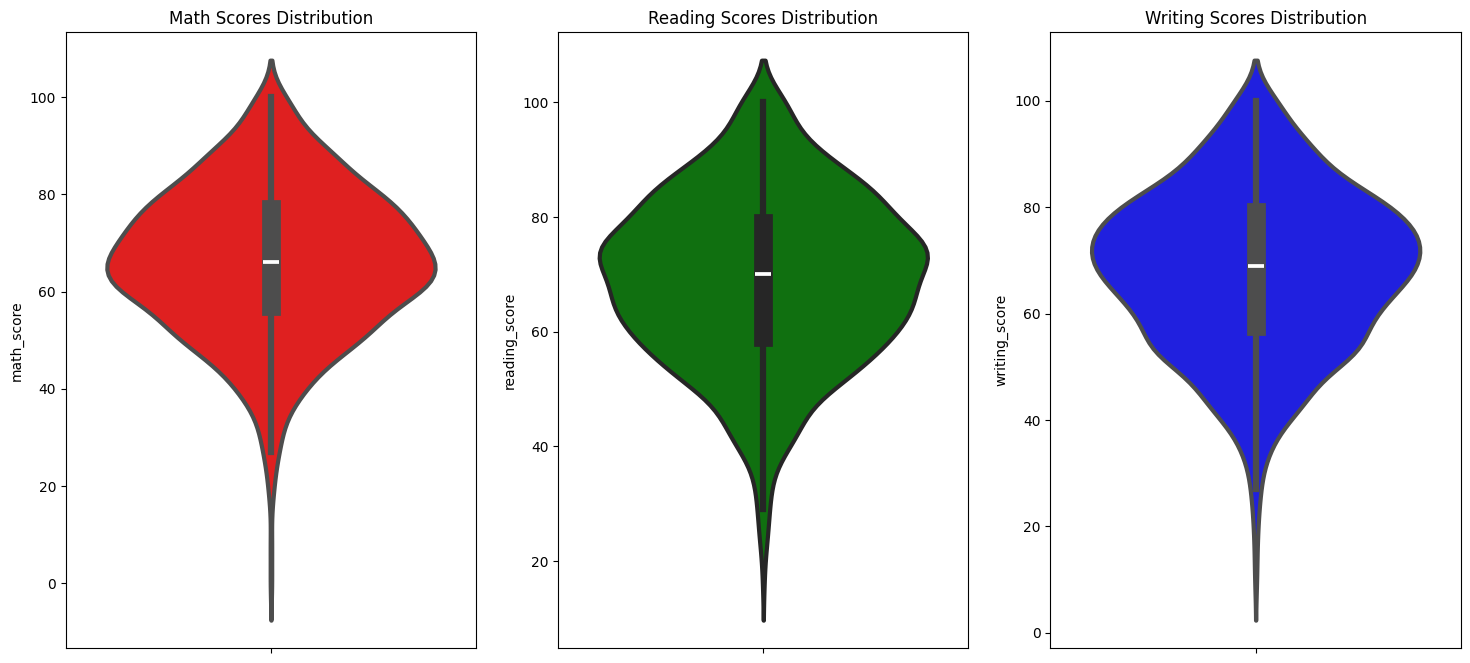

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sns.violinplot(y='math_score', data=df, color='red', linewidth=3, ax=axs[0])
axs[0].set_title('Math Scores Distribution')

sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, ax=axs[1])
axs[1].set_title('Reading Scores Distribution')

sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, ax=axs[2])
axs[2].set_title('Writing Scores Distribution')

plt.tight_layout
plt.show()


**Observations**

The comparison of score distributions across the three subjects reveals the following:  

- **Mathematics.**  
  The majority of students scored between *60* and *80*.  

- **Reading and Writing.**  
  In both subjects, most students scored between *50* and *80*.  

**Interpretation.**  
These results indicate that student performance clusters within a mid-range band, with mathematics scores slightly shifted upward compared to reading and writing. This challenges the idea that mathematics had the lowest score distribution of the three.


### 4.3 Demographic Distribution

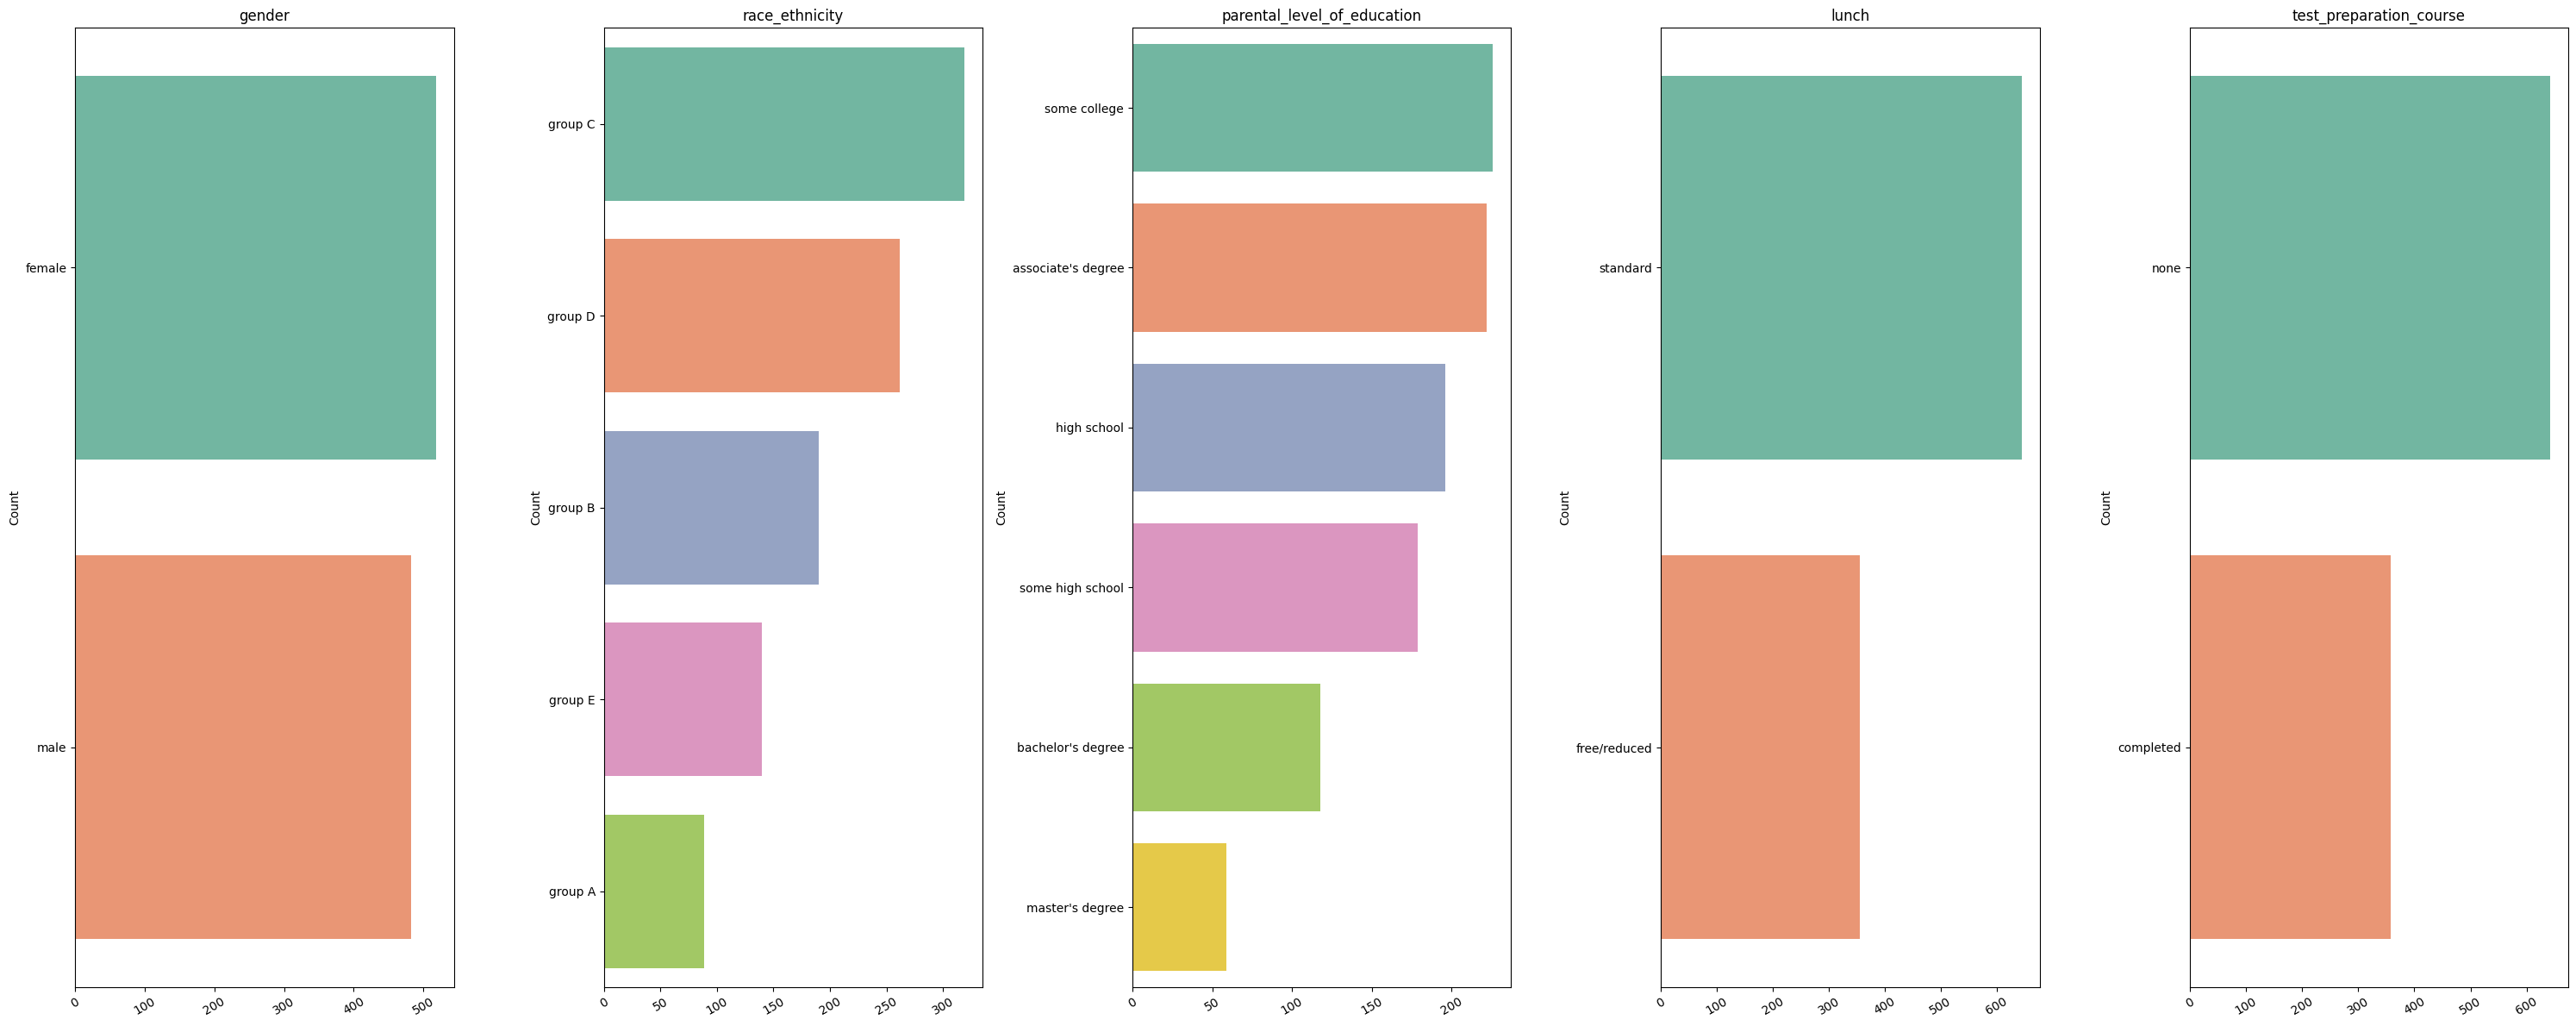

In [25]:

fig, axs = plt.subplots(1, 5, figsize=(30, 12))

column_names = df.select_dtypes(include='object').columns

# Dynamically creates the bar plot for each of the categorical columns
for i, column in enumerate(column_names):
    counts = df[column].value_counts().reset_index()
    sns.barplot(data=counts, x='count', y=column, ax=axs[i], palette="Set2")
    axs[i].set_title(column)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

**Observations**

The demographic distribution of the dataset reveals the following findings:  

- **Gender distribution.**  
  The number of male and female students is *almost equal*.  

- **Ethnicity distribution.**  
  The largest group of students belongs to *Race/Ethnicity Group C*.  

- **Parental education.**  
  Most parents report *“Some College”* or an *“Associate’s Degree”* as their highest level of education, with both categories being close in frequency.  

- **Lunch type.**  
  A significantly greater number of students receive a *standard lunch* compared to those with *free or reduced lunch*.  

- **Test preparation.**  
  More students have *not enrolled* in a test preparation course than those who have completed one.  

**Interpretation.**  
These results provide a clear demographic profile of the sample, suggesting balance in gender representation, overrepresentation of Group C, and trends in parental education, lunch type, and test preparation that may be relevant when interpreting performance outcomes.


### 4.4 Feature Wise Visualizations

#### 4.4.1 Gender Feature

We wish to answer the following **questions**:
1. What is the distribution of the gender column?
2. Does gender have any impact on student's performance?

##### Distribution of Students by Gender

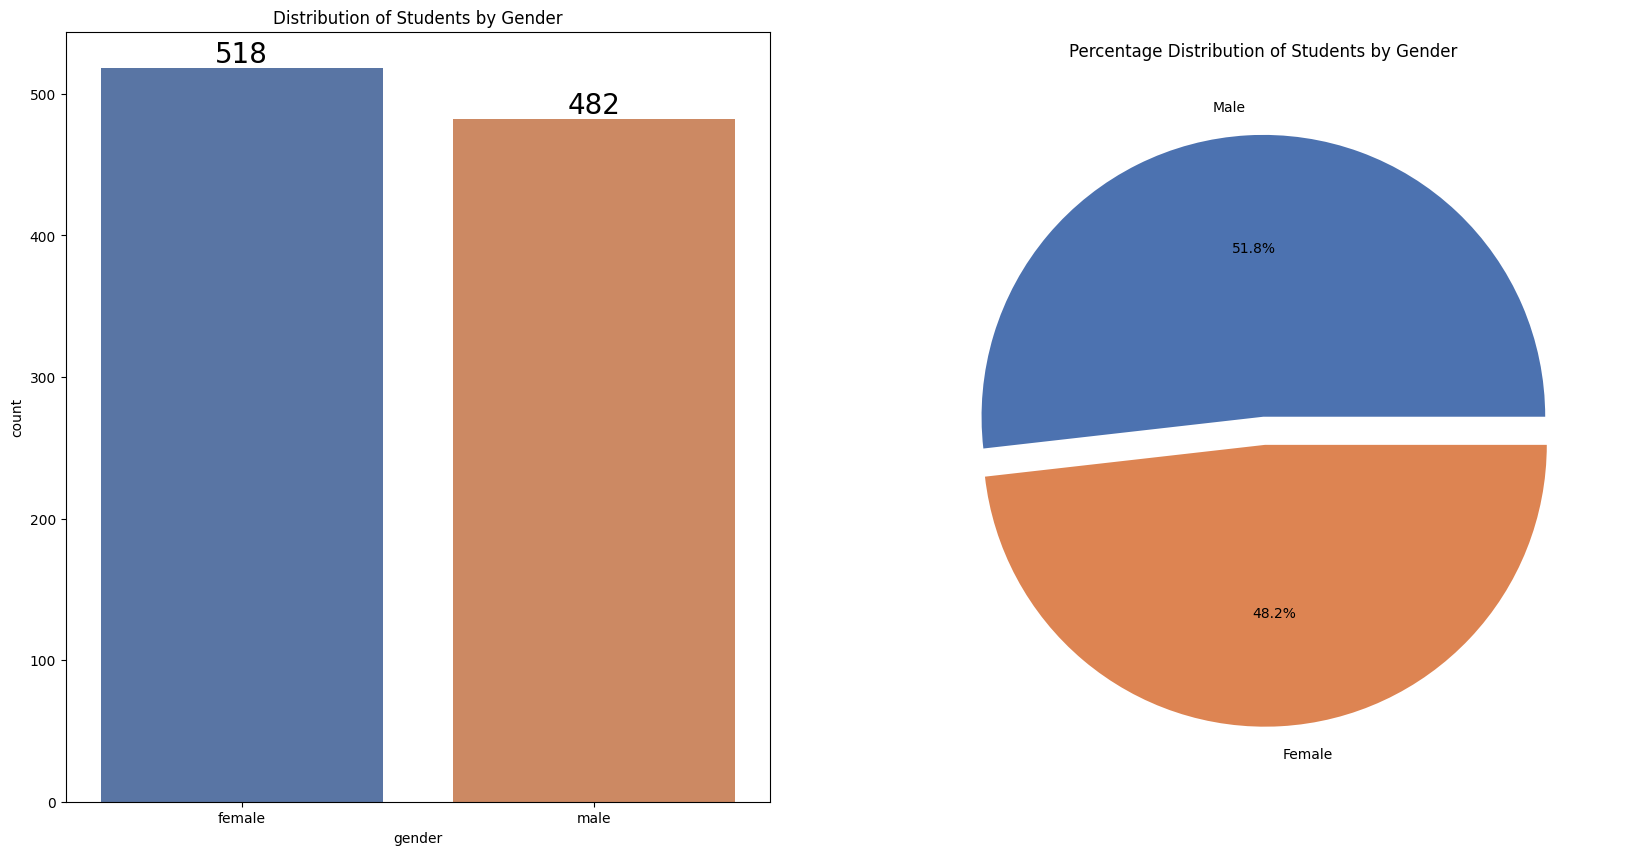

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Generation of the Count plot
sns.countplot(data=df, x=df['gender'], palette='deep', ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
axs[0].set_title("Distribution of Students by Gender")
    
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=(0, 0.1), autopct='%1.1f%%', colors=sns.color_palette("deep"))
        
##plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
axs[1].set_title("Percentage Distribution of Students by Gender")

plt.show()

**Observations** 

- **Gender distribution.**  
  The dataset is relatively balanced, with *518 female students (48%)* and *482 male students (52%)*.  

**Interpretation.**  
This near-equal distribution ensures that gender-based comparisons are meaningful and not biased by unequal sample sizes.


##### Impact of Gender on student's performance

In [27]:
gender_group = df.groupby("gender").mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


**Observations**  

- **Female students.**  
  On average, female students outperform male students overall. Their strongest subjects are *Reading* and *Writing*, where they consistently achieve higher scores.  

- **Male students.**  
  Male students tend to perform slightly worse overall; however, they score approximately *five points higher* than females in *Mathematics*.  

**Interpretation.**  
These results suggest a gender-based performance pattern: females excel in language-related subjects, while males show a relative strength in mathematics despite lower overall averages.


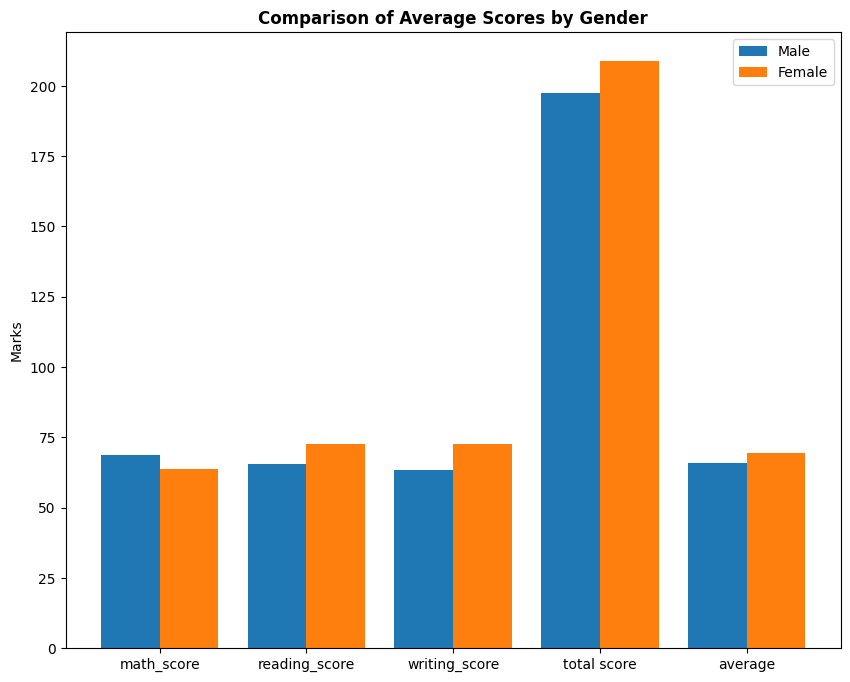

In [28]:
plt.figure(figsize=(10, 8))

X = list(gender_group.columns)
X_axis = np.arange(len(X))

# Save the scores in a list for each gender
female_scores = [gender_group.loc['female', score_type] for score_type in gender_group.columns]
male_scores = [gender_group.loc['male', score_type] for score_type in gender_group.columns]

# Create the chart
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Comparison of Average Scores by Gender", fontweight='bold')
plt.legend()
plt.show()

#### 4.4.2 Race/Ethnicity Feature

We wish to answer the following **questions**:
1. What is the Group wise distribution?
2. Does Race/Ethnicity have any impact on student's performance?

##### Distribution of Students by Race/Ethnicity Group

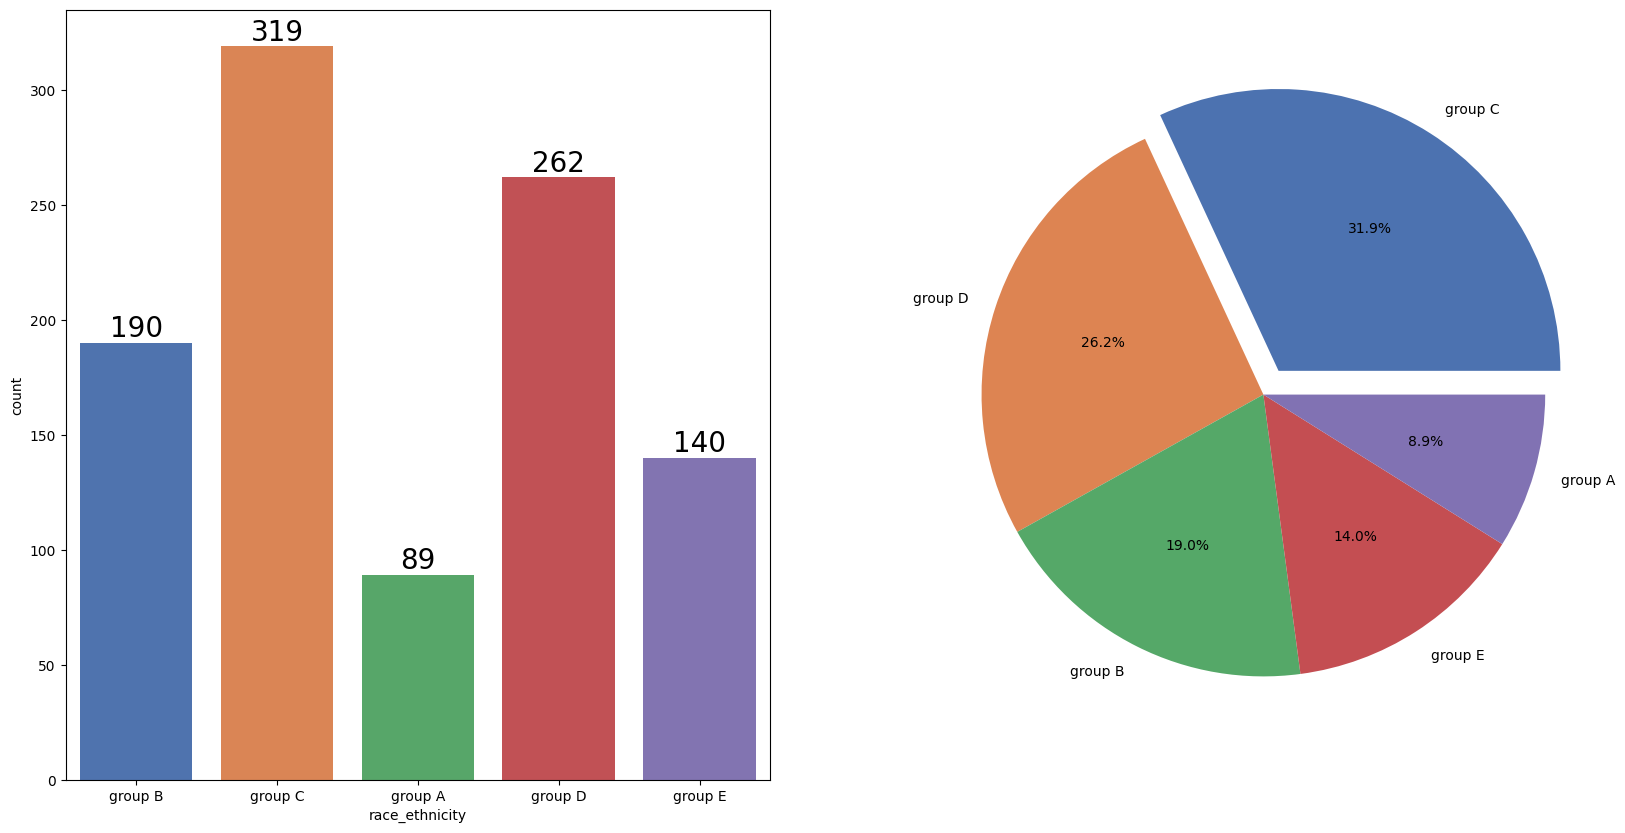

In [29]:
figs, axs = plt.subplots(1, 2, figsize=(20,10))

sns.countplot(x=df['race_ethnicity'], data=df, palette=sns.color_palette("deep"), ax=axs[0], saturation=0.95)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', colors=sns.color_palette("deep"))

plt.show()   

**Observations**  

- **Group C and D**
  Most students fall in the Group C and D category. This is around 58.1% of students. Accounting for 319 students in group C and 262 students for group D

**Interpretation.**  
These results demonstrate that the majority of the students fall between Group C and D, and would expect that their scores would affect the average the most. Group A has the lowest amount of students, meaning that their scores might not affect the distribution as much.


##### Impact of Race/Ethnicity on student's performance

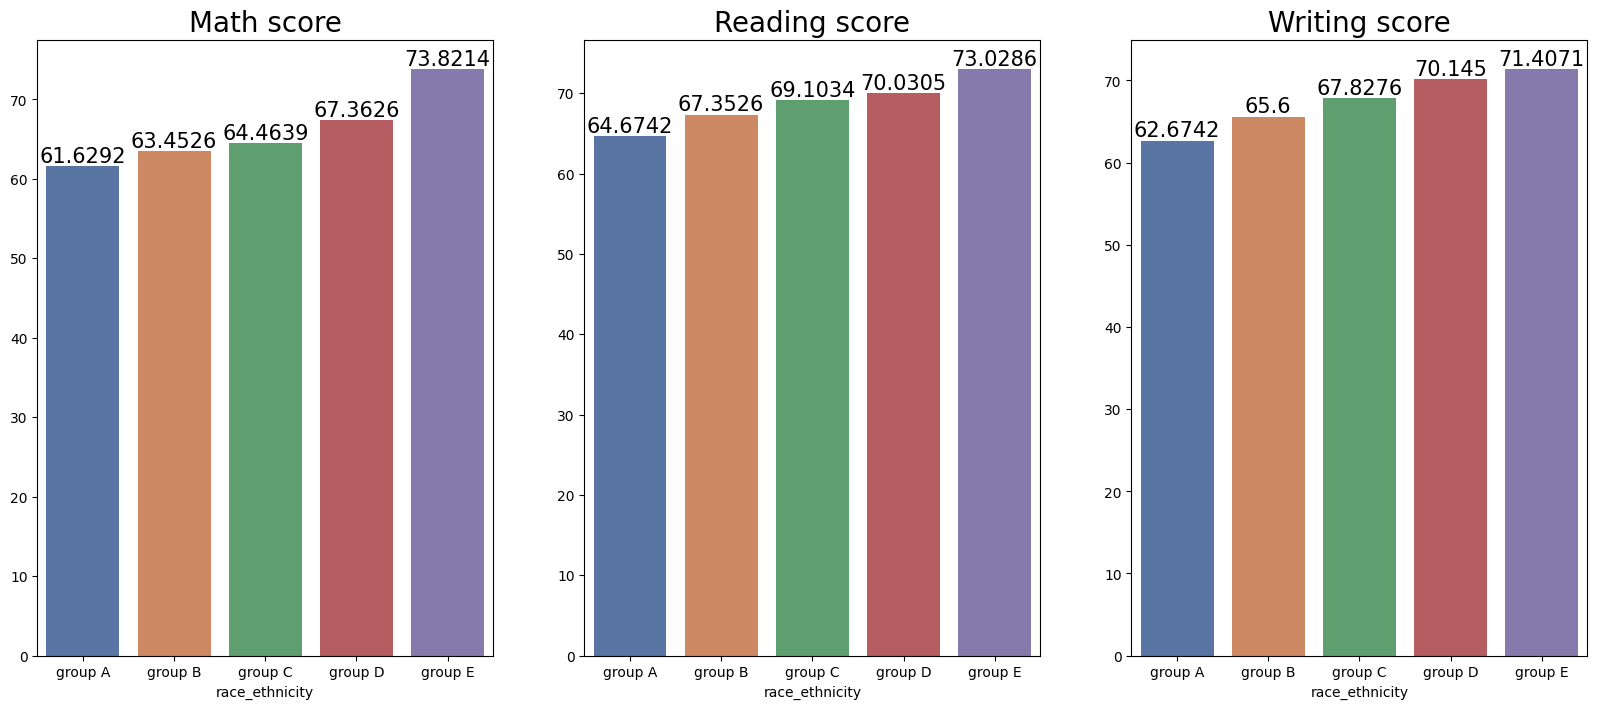

In [30]:
ethnicity_group = df.groupby('race_ethnicity')

figs, axs = plt.subplots(1, 3, figsize=(20,8))

# Bar plot Math Score
sns.barplot(x=ethnicity_group['math_score'].mean().index, y=ethnicity_group['math_score'].mean().values, palette=sns.color_palette("deep"), ax=axs[0])
axs[0].set_title('Math score', color='black', size=20)
for container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=15)

# Bar plot Reading score
sns.barplot(x=ethnicity_group['reading_score'].mean().index, y=ethnicity_group['reading_score'].mean().values, palette=sns.color_palette("deep"), ax=axs[1])
axs[1].set_title('Reading score', color='black', size=20)
for container in axs[1].containers:
    axs[1].bar_label(container,color='black',size=15)

sns.barplot(x=ethnicity_group['writing_score'].mean().index, y=ethnicity_group['writing_score'].mean().values, palette=sns.color_palette("deep"), ax=axs[2])
axs[2].set_title('Writing score', color='black', size=20)
for container in axs[2].containers:
    axs[2].bar_label(container, color='black', size=15)
    
plt.show()

**Observations**  

- **Group E.**  
  Students in Group E consistently outperform all other groups across mathematics, reading, and writing.  

- **Group A.**  
  Students in Group A consistently underperform across all three subjects.  

**Interpretation.**  
Groups C and D demonstrate mid-level performance, aligning with expectations from the dataset. Importantly, each group maintains a consistent relative position across all subjects: Group E performs the best, Group A the worst, and Groups C and D remain in the middle. This suggests that group membership is a stable predictor of performance across subject areas.

#### 4.4.3 Parental Level of Education Feature

1. What is the educational background of student's parents?
2. Does parental level of education have any impact on student's performance?

##### Distribution of Students by Parental Level of Education

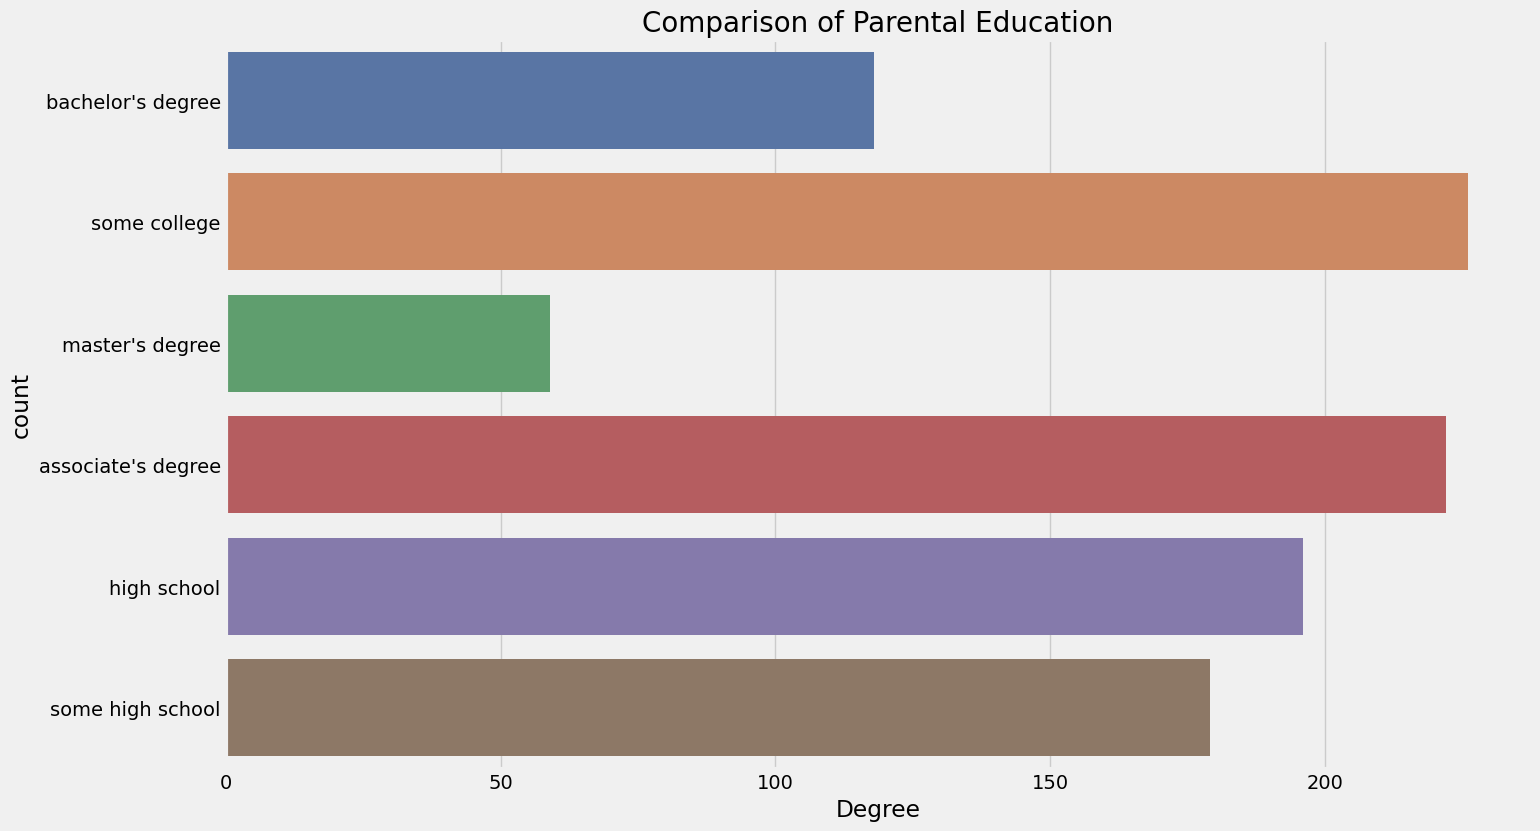

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'], palette='deep')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')

plt.show()

**Observations**  
The most common parental education level is *“Some College”*, followed closely by *“Associate’s Degree”*. The least common level of education among parents is a *Master’s Degree*.  

**Interpretation**  
Overall, the data suggests that most parents have attained at least some form of higher education. The prevalence of *Some College* indicates that many parents pursued education beyond high school, even if a degree was not completed. Similarly, the high frequency of *Associate’s Degrees* reflects a level of specialized training or expertise. By contrast, the small proportion of parents with a *Master’s Degree* is consistent with expectations, given the higher level of academic commitment required.

##### Impact of Parental Level of Education on student's peformance

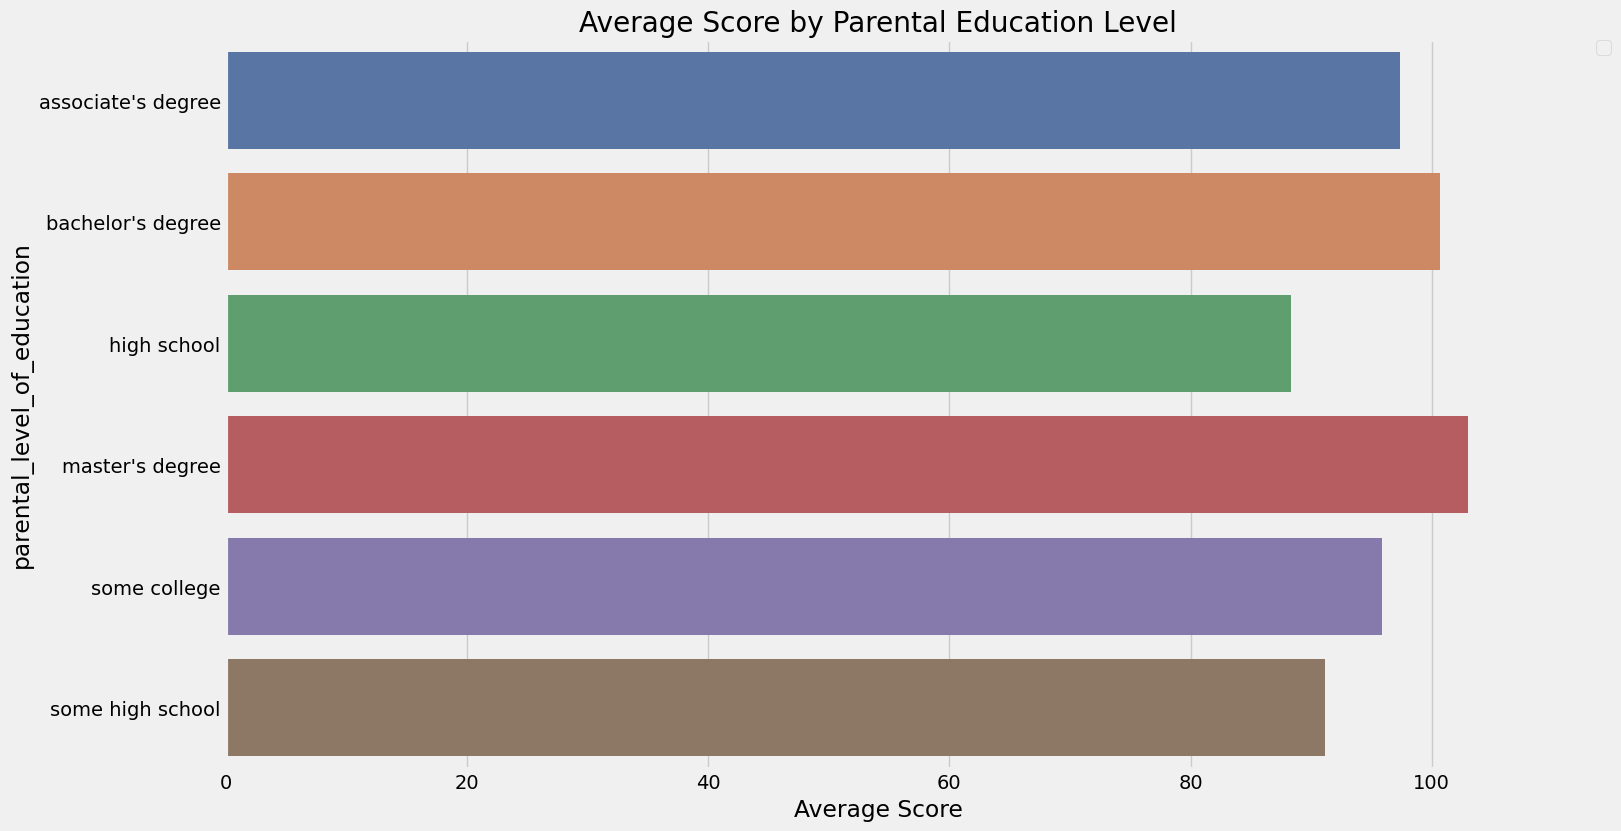

In [32]:
parental_education = df.groupby("parental_level_of_education").mean(numeric_only=True).reset_index()

parental_education_melt = parental_education.melt(
    id_vars="parental_level_of_education",
    var_name="Subject",
    value_name="Average Score",
)

sns.barplot(data=parental_education_melt, x="Average Score", y="parental_level_of_education", palette='deep', orient="h", ci=None)
plt.title("Average Score by Parental Education Level")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


**Observations**  
- Students whose parents possess a *Master’s Degree* or a *Bachelor’s Degree* tend to achieve higher scores compared to other groups.  
- Students whose parents have only a *High School* education show the lowest performance overall.  
- Differences in average scores across education levels exist, but they are not extreme.  

**Interpretation**  
These results suggest a modest positive relationship between parental education level and student performance. While higher parental education (bachelor’s or master’s degrees) appears associated with better outcomes, the performance gap compared to other groups is relatively small.

#### 4.4.4 Lunch Type Column 


1. Which type of lunch is most commong among students?
2. What is the effect of lunch type on test results?

##### Distribution of Lunch Type among students

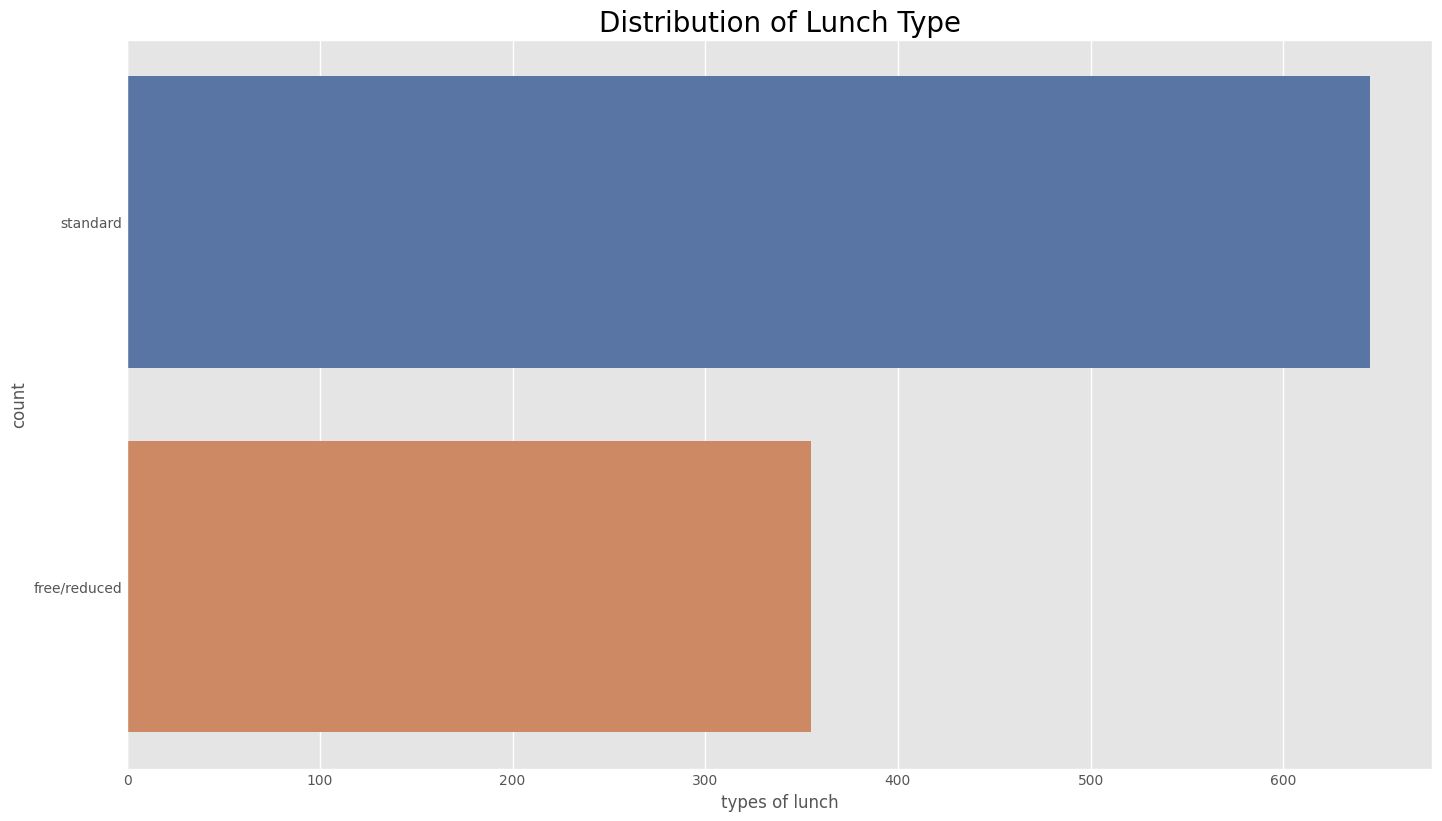

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(df['lunch'], palette = 'deep')
plt.title('Distribution of Lunch Type', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')

plt.show()

**Observations**  
   Students by far consume a standard lunch, which is more substantial than the free/reduced lunch.

##### Impact of Lunch type of student's performance

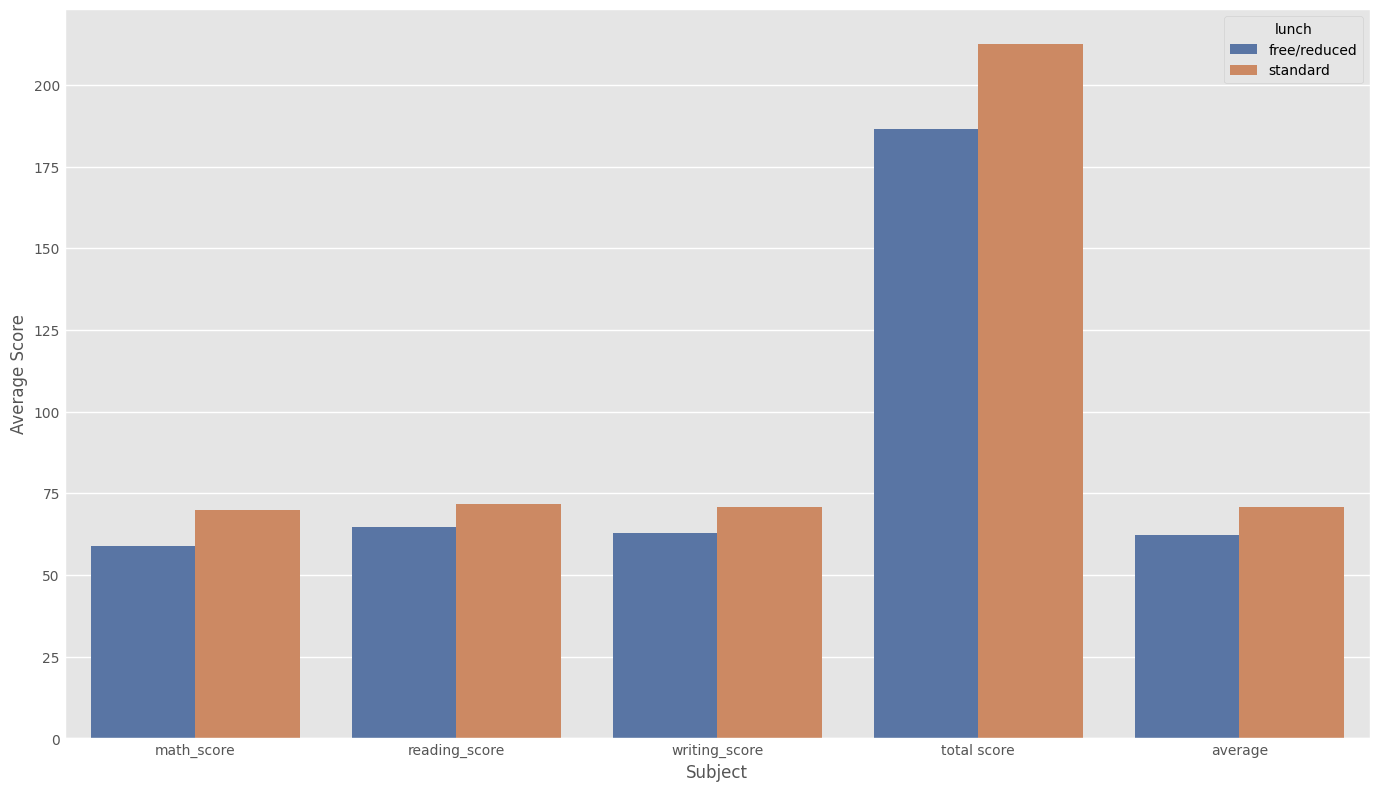

In [34]:
lunch_group = df.groupby('lunch').mean(numeric_only=True).reset_index()
lunch_melted = lunch_group.melt(
    id_vars='lunch',
    var_name='Subject',
    value_name='Average Score',
)

sns.barplot(data=lunch_melted, x="Subject", y="Average Score", hue="lunch", palette='deep')

plt.show()

**Observations**  
Students who receive a *standard lunch* consistently outperform those who receive *free or reduced lunch* across all subjects, as well as in total and average scores.  

**Interpretation**  
This pattern suggests that adequate nutrition may play a role in supporting academic performance. Access to a full, balanced meal before an exam could help reduce distractions and provide the necessary energy for optimal test-taking.

#### 4.4.5 Test Preparation Course Feature

1. Did most students complete the test preparation course?
2. Does the test preparation course have any impact on student's performance?

##### Distribution of students that completed the test preparation course

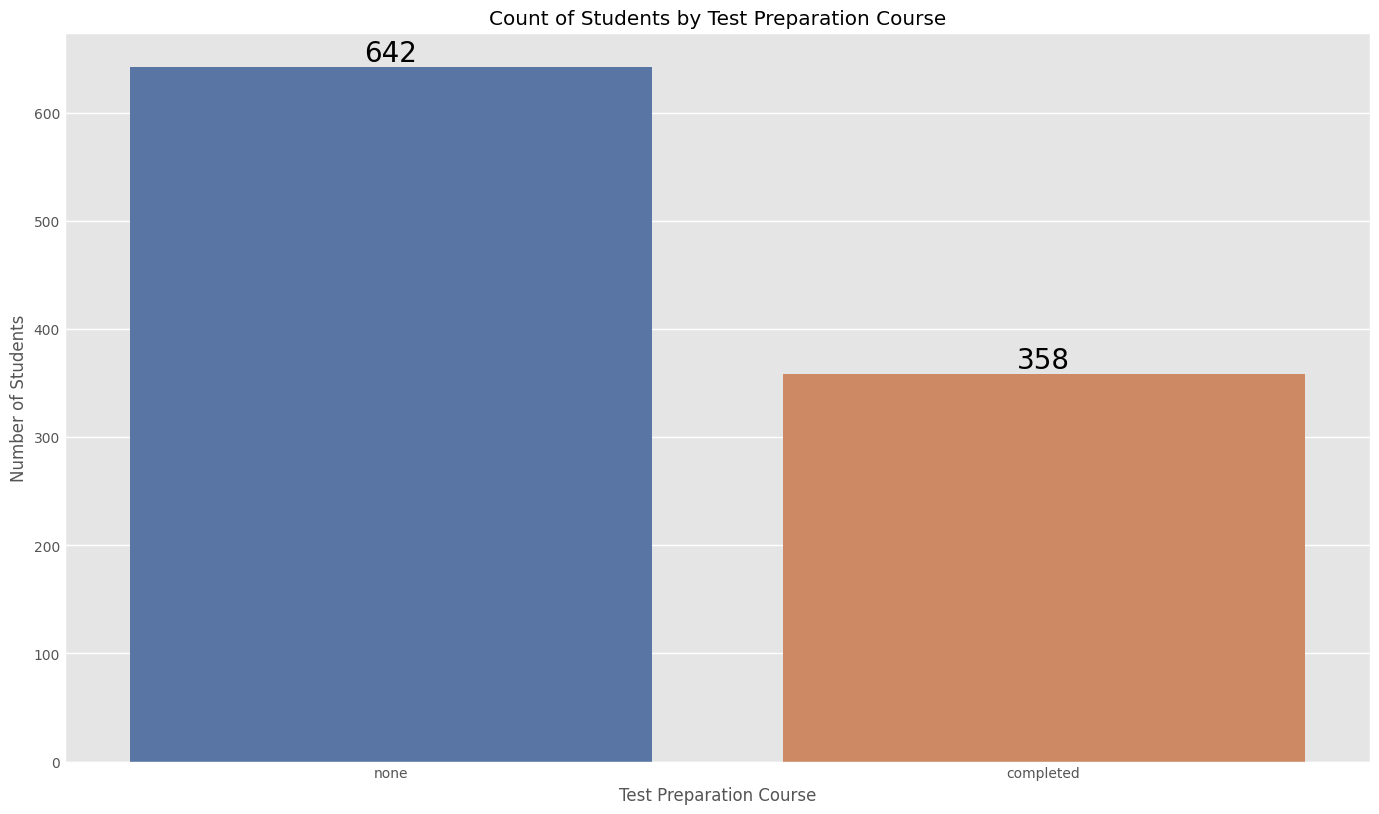

In [58]:
ax = sns.countplot(data=df, x="test_preparation_course", palette="deep")
plt.title("Count of Students by Test Preparation Course")
plt.xlabel("Test Preparation Course")
plt.ylabel("Number of Students")
for container in ax.containers:
    ax.bar_label(container, size=20)
    
plt.show()

**Observations**  
The students that have completed the test preparation course are close to half of those who have not completed it. The students that have not completed the test preparation course are by far the most, the amount is 642 not completed versus 358 completed.

##### Impact of test preparation course completion on student performance

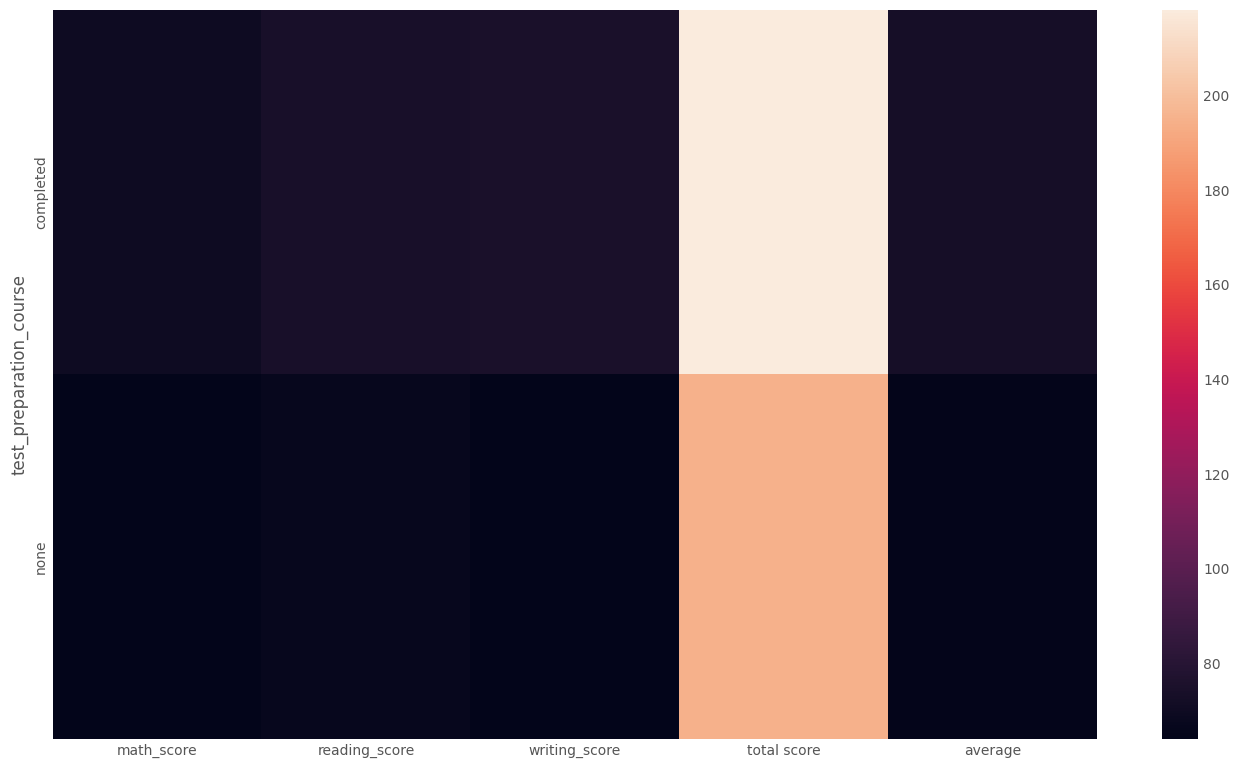

In [79]:
test_group = df.groupby('test_preparation_course').mean(numeric_only=True)
sns.heatmap(test_group)
plt.show()

#### 4.4.6 Checking Outliers

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Multivariate Analysis with Pair Plot

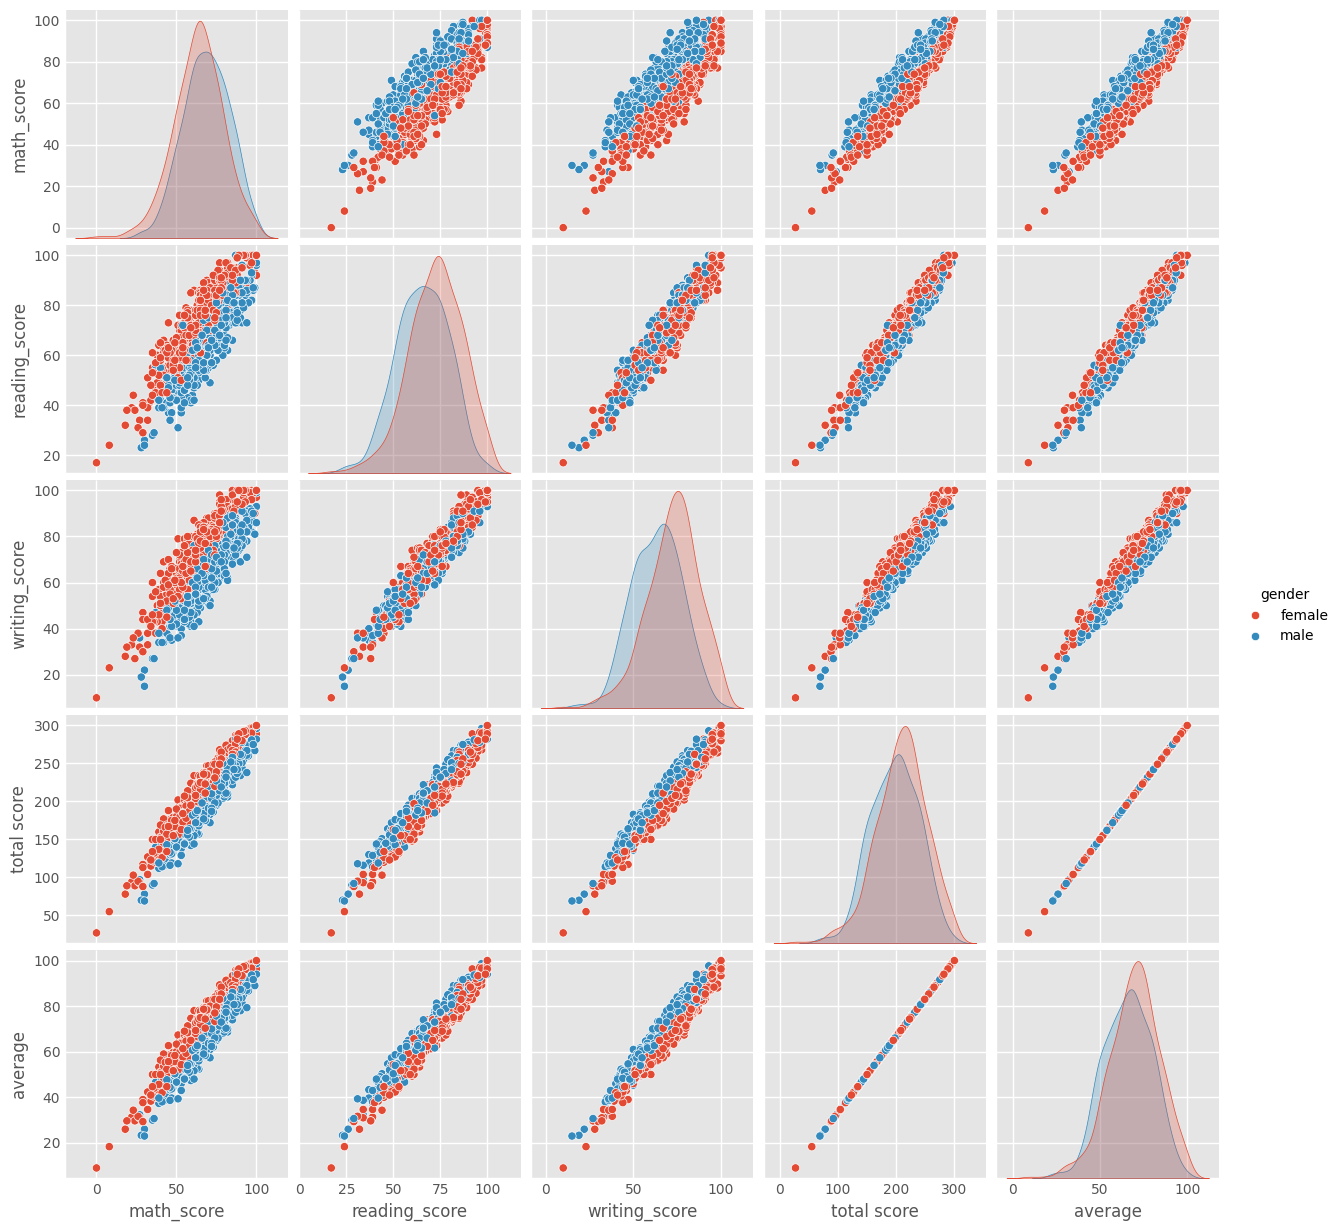

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.